<a href="https://colab.research.google.com/github/3ddy98/Adult-Income-SVC/blob/main/adults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.inspection import permutation_importance
import seaborn as sns

In [4]:
columns = []
with open('features.csv') as file:
    reader = csv.reader(file, delimiter=',')  # Use ',' for comma-delimited, '\t' for tab-delimited, etc.
    for row in reader:
       columns.append(row[0])
columns.append('50K')

In [5]:
df = pd.read_csv('adult.data',header=None)
df.columns = columns
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

          50K  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
50K               object
dtype: object

In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50K               0
dtype: int64

In [28]:
df_obj = df.select_dtypes('object')
target = df['50K']
df_obj_target = df_obj
df_obj = df_obj.drop(columns='50K')
obj_cols = df_obj.columns
obj_cols_ord = []
for x in range(len(obj_cols)):
    obj_cols_ord.append(obj_cols[x] + ('-ord'))
df_obj

workclass    education       marital-status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native-country  
0            Adm-clerical   Not-in-family   White     Male   United-States  
1         Exec-managerial         Husband   White     Male   United-States  
2       Handlers-cleaners   Not-in-family   White     Male   United-States  
3       Handlers-cleaners         Husband   Black     Male   United-States  
4          Prof-specialty            Wife   Black   Female            Cuba  
...                   ...             ...     ...      ...             ...  
32556        Tech-support            Wife   White   Female   United-States  
32557   Machine-op-inspct         Husband   White     Male   United-States  
32558        Adm-clerical       Unmarried   White   Female   United-States  
32559        Adm-clerical       Own-child   White     Male   United-States  
32560     Exec-managerial            Wife   White   Female   United-States  

[32561 rows x 8 columns]

In [9]:
enc = preprocessing.OrdinalEncoder()
enc.fit(df_obj)
oh_obj_cols = pd.DataFrame(enc.transform(df_obj))
oh_obj_cols.columns = obj_cols_ord
oh_obj_cols

workclass-ord  education-ord  marital-status-ord  occupation-ord  \
0                7.0            9.0                 4.0             1.0   
1                6.0            9.0                 2.0             4.0   
2                4.0           11.0                 0.0             6.0   
3                4.0            1.0                 2.0             6.0   
4                4.0            9.0                 2.0            10.0   
...              ...            ...                 ...             ...   
32556            4.0            7.0                 2.0            13.0   
32557            4.0           11.0                 2.0             7.0   
32558            4.0           11.0                 6.0             1.0   
32559            4.0           11.0                 4.0             1.0   
32560            5.0           11.0                 2.0             4.0   

       relationship-ord  race-ord  sex-ord  native-country-ord  
0                   1.0       4.0      1.0                39.0  
1                   0.0       4.0      1.0                39.0  
2                   1.0       4.0      1.0                39.0  
3                   0.0       2.0      1.0                39.0  
4                   5.0       2.0      0.0                 5.0  
...                 ...       ...      ...                 ...  
32556               5.0       4.0      0.0                39.0  
32557               0.0       4.0      1.0                39.0  
32558               4.0       4.0      0.0                39.0  
32559               3.0       4.0      1.0                39.0  
32560               5.0       4.0      0.0                39.0  

[32561 rows x 8 columns]

In [10]:
df_int = df.select_dtypes('int64')
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
df_num = df_int.join(oh_obj_cols)
df_num

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       workclass-ord  education-ord  marital-status-ord  occupation-ord  \
0                7.0            9.0                 4.0             1.0   
1                6.0            9.0                 2.0             4.0   
2                4.0           11.0                 0.0             6.0   
3                4.0            1.0                 2.0             6.0   
4                4.0            9.0                 2.0            10.0   
...              ...            ...                 ...             ...   
32556            4.0            7.0                 2.0            13.0   
32557            4.0           11.0                 2.0             7.0   
32558            4.0           11.0                 6.0             1.0   
32559            4.0           11.0                 4.0             1.0   
32560            5.0           11.0                 2.0             4.0   

       relationship-ord  race-ord  sex-ord  native-country-ord  
0                   1.0       4.0      1.0                39.0  
1                   0.0       4.0      1.0                39.0  
2                   1.0       4.0      1.0                39.0  
3                   0.0       2.0      1.0                39.0  
4                   5.0       2.0      0.0                 5.0  
...                 ...       ...      ...                 ...  
32556               5.0       4.0      0.0                39.0  
32557               0.0       4.0      1.0                39.0  
32558               4.0       4.0      0.0                39.0  
32559               3.0       4.0      1.0                39.0  
32560               5.0       4.0      0.0                39.0  

[32561 rows x 14 columns]

In [12]:
target = df.iloc[:,-1:]
target

50K
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
32556   <=50K
32557    >50K
32558   <=50K
32559   <=50K
32560    >50K

[32561 rows x 1 columns]

In [13]:
enc_3 = preprocessing.OrdinalEncoder()
enc_3.fit(target)
target_ord = pd.DataFrame(enc_3.transform(target),columns=['50K-ord'])
target_ord

50K-ord
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
32556      0.0
32557      1.0
32558      0.0
32559      0.0
32560      1.0

[32561 rows x 1 columns]

In [14]:
clean_df = df_num.join(target_ord)
clean_df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  workclass-ord  education-ord  marital-status-ord  \
count    32561.000000   32561.000000   32561.000000        32561.000000   
mean        40.437456       3.868892      10.298210            2.611836   
std         12.347429       1.455960       3.870264            1.506222   
min          1.000000       0.000000       0.000000            0.000000   
25%         40.000000       4.000000       9.000000            2.000000   
50%         40.000000       4.000000      11.000000            2.000000   
75%         45.000000       4.000000      12.000000            4.000000   
max         99.000000       8.000000      15.000000            6.000000   

       occupation-ord  relationship-ord      race-ord       sex-ord  \
count    32561.000000      32561.000000  32561.000000  32561.000000   
mean         6.572740          1.446362      3.665858      0.669205   
std          4.228857          1.606771      0.848806      0.470506   
min          0.000000          0.000000      0.000000      0.000000   
25%          3.000000          0.000000      4.000000      0.000000   
50%          7.000000          1.000000      4.000000      1.000000   
75%         10.000000          3.000000      4.000000      1.000000   
max         14.000000          5.000000      4.000000      1.000000   

       native-country-ord       50K-ord  
count        32561.000000  32561.000000  
mean            36.718866      0.240810  
std              7.823782      0.427581  
min              0.000000      0.000000  
25%             39.000000      0.000000  
50%             39.000000      0.000000  
75%             39.000000      0.000000  
max             41.000000      1.000000

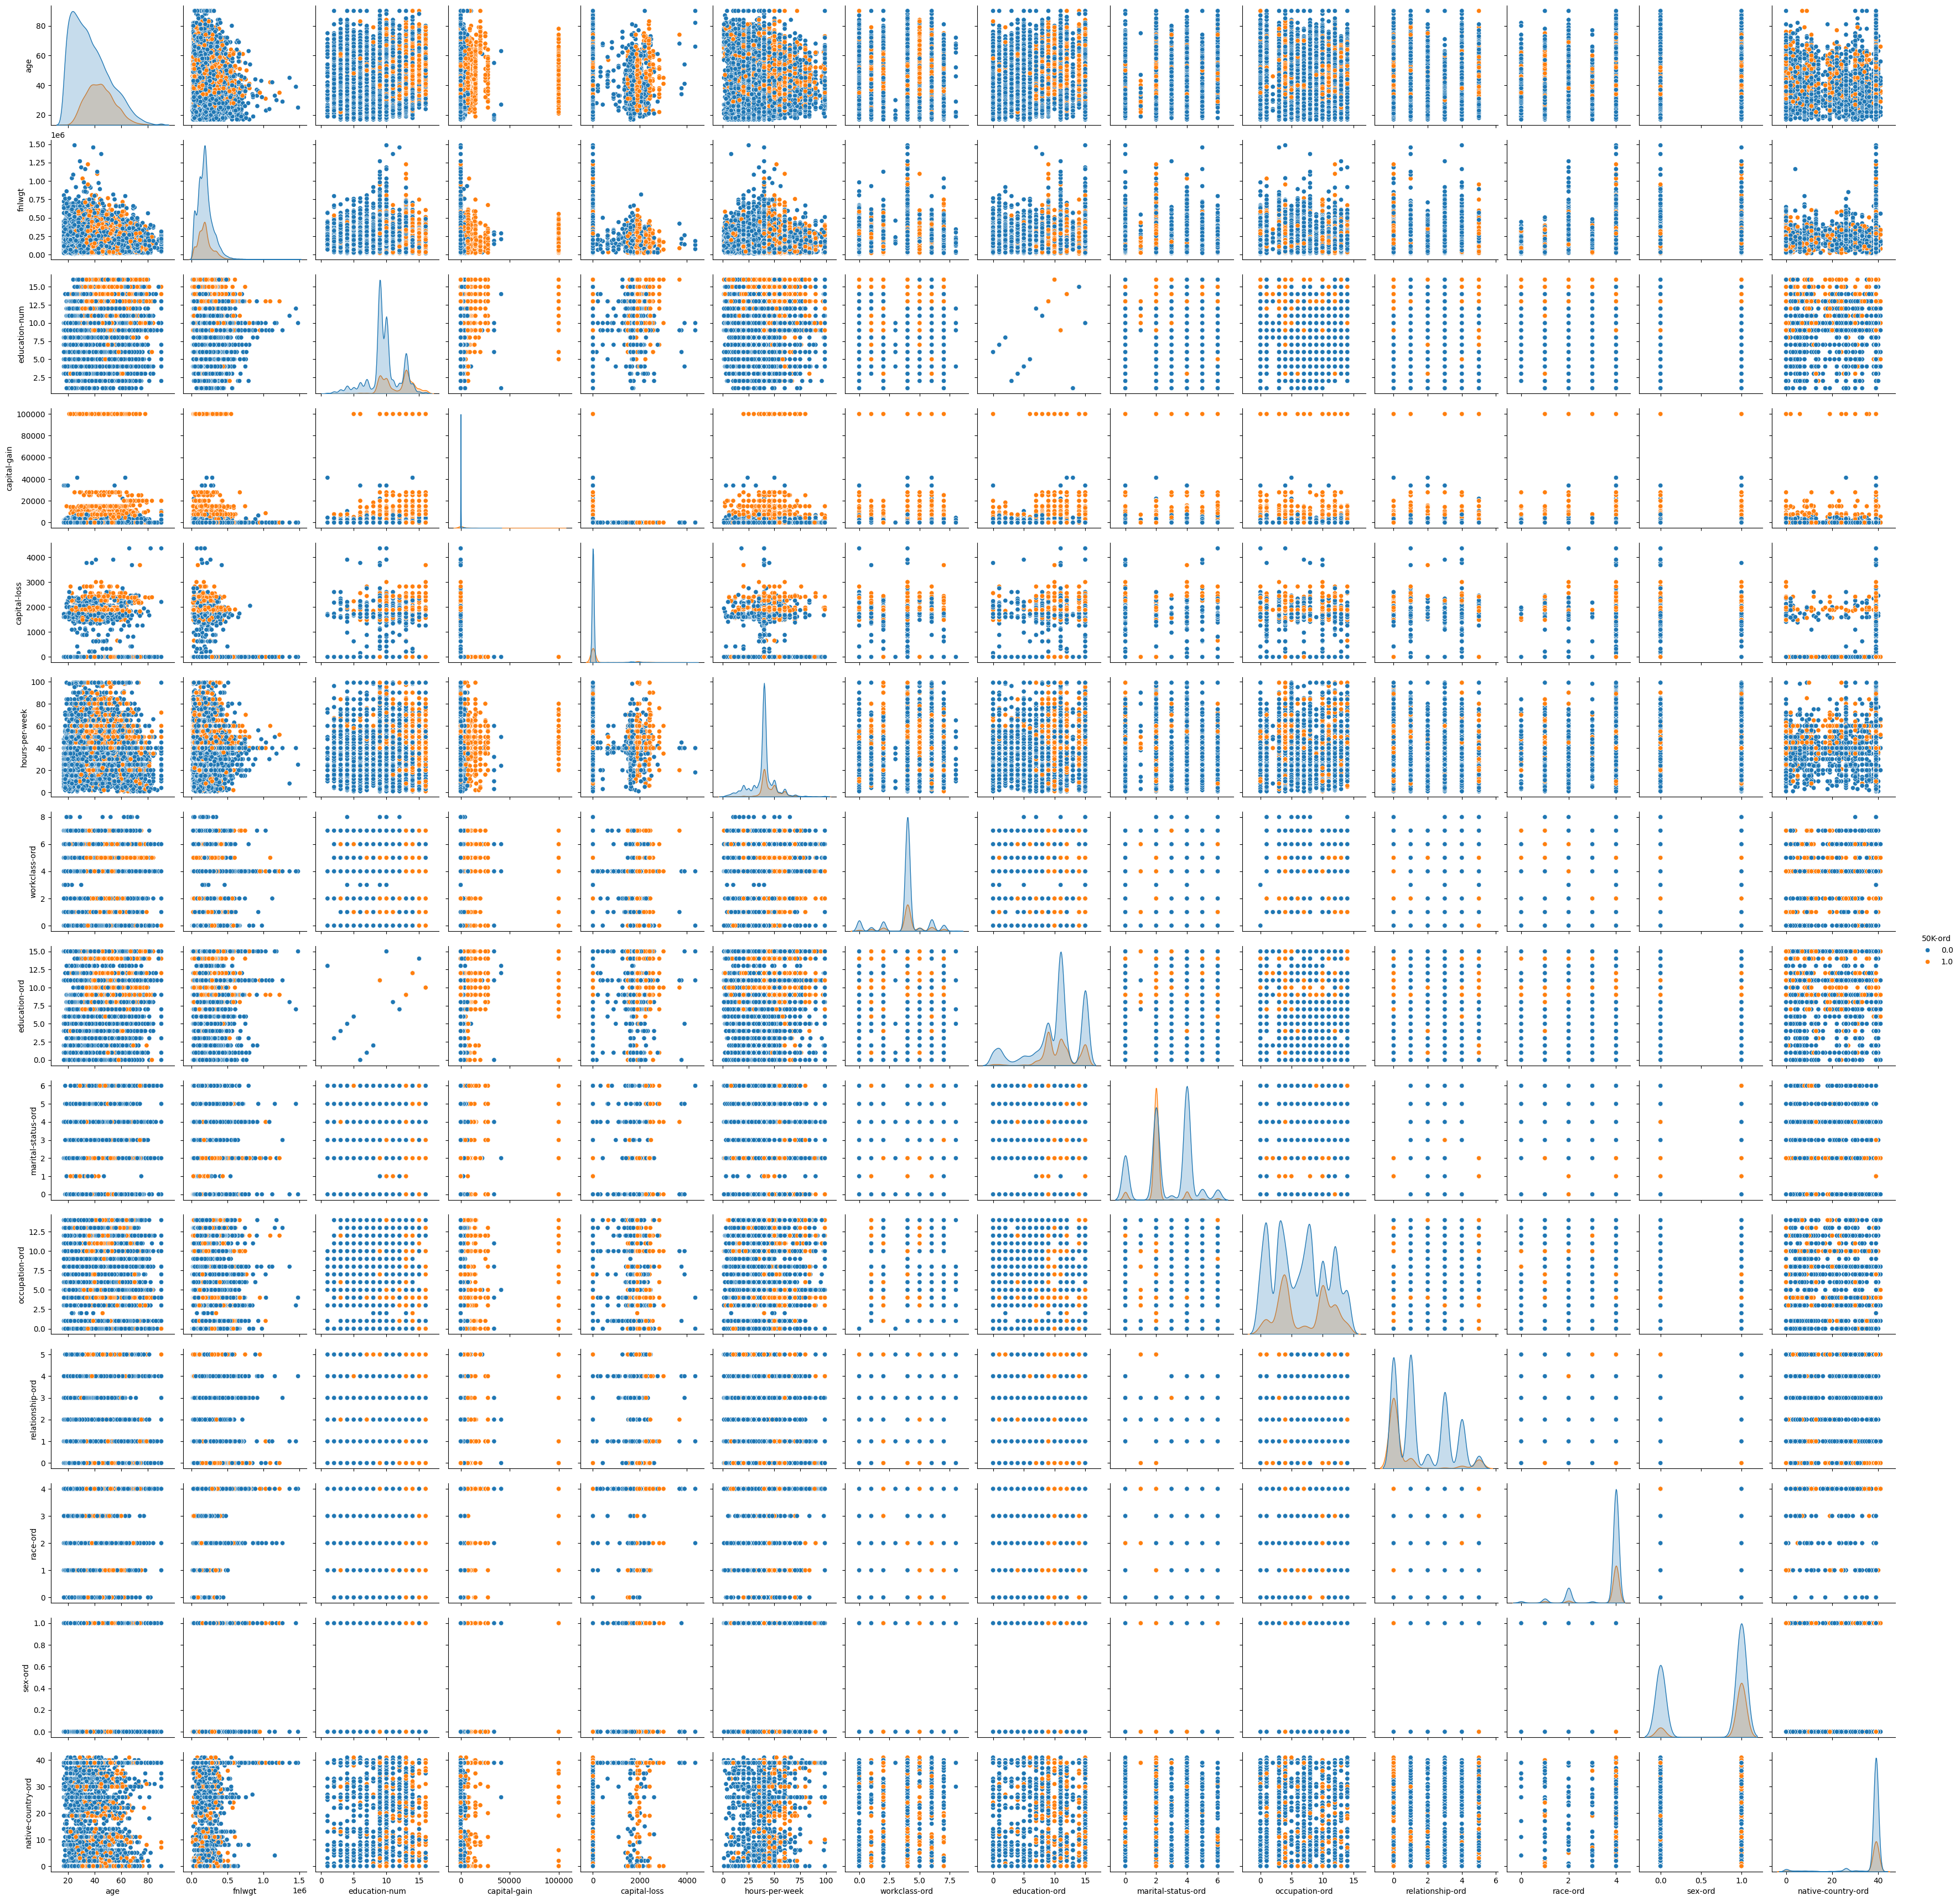

In [34]:
sns.pairplot(clean_df,hue='50K-ord')

In [16]:
pipe = make_pipeline(preprocessing.StandardScaler(),svm.SVC())
x_train,x_test,y_train,y_test = train_test_split(df_num,target_ord,test_size=0.33,random_state=42)
params = {'svc__C':np.geomspace(.1,4,25), 'svc__kernel':['rbf','sigmoid']}
clf = GridSearchCV(pipe,params,verbose=3)
clf.fit(x_train,np.ravel(y_train))
clf.cv_results_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......svc__C=0.1, svc__kernel=rbf;, score=0.835 total time=   7.1s
[CV 2/5] END .......svc__C=0.1, svc__kernel=rbf;, score=0.839 total time=   7.2s
[CV 3/5] END .......svc__C=0.1, svc__kernel=rbf;, score=0.829 total time=   7.2s
[CV 4/5] END .......svc__C=0.1, svc__kernel=rbf;, score=0.837 total time=   7.2s
[CV 5/5] END .......svc__C=0.1, svc__kernel=rbf;, score=0.841 total time=   7.2s
[CV 1/5] END ...svc__C=0.1, svc__kernel=sigmoid;, score=0.768 total time=  10.5s
[CV 2/5] END ...svc__C=0.1, svc__kernel=sigmoid;, score=0.777 total time=   9.6s
[CV 3/5] END ...svc__C=0.1, svc__kernel=sigmoid;, score=0.767 total time=   9.6s
[CV 4/5] END ...svc__C=0.1, svc__kernel=sigmoid;, score=0.768 total time=   9.5s
[CV 5/5] END ...svc__C=0.1, svc__kernel=sigmoid;, score=0.771 total time=   9.4s
[CV 1/5] END svc__C=0.1166144852618106, svc__kernel=rbf;, score=0.835 total time=   7.1s
[CV 2/5] END svc__C=0.1166144852618106,

{'mean_fit_time': array([5.653055  , 8.36267085, 5.59140921, 8.05877595, 5.54828906,
        8.11940947, 5.55310135, 8.02905073, 5.59425564, 7.92484736,
        5.58176427, 7.66873984, 5.60625415, 7.85408015, 5.62000451,
        7.70697222, 5.62080054, 7.84342113, 5.6252337 , 7.60640121,
        5.58689528, 7.56929588, 5.60938606, 7.30640149, 5.68855677,
        7.26985736, 5.78984532, 7.3289722 , 5.84254985, 7.97710872,
        5.89813161, 6.97974644, 5.99610763, 7.42009773, 6.05600843,
        7.12425671, 6.18274646, 6.93952656, 6.30120783, 6.68968101,
        6.40701532, 6.84370594, 6.550564  , 7.07986588, 6.66703572,
        7.84066544, 6.87938218, 6.88592072, 7.01997514, 6.97014995]),
 'std_fit_time': array([0.03574573, 0.40079832, 0.04443921, 0.3561023 , 0.02217485,
        0.5407557 , 0.04943772, 0.60250019, 0.04387251, 0.69399186,
        0.04514573, 0.40622338, 0.02892007, 0.48535481, 0.04041853,
        0.44349225, 0.06722905, 0.16695229, 0.05237986, 0.44487812,
        0.060

In [17]:
clf.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=4.0))])

In [18]:
clf.best_params_

{'svc__C': 4.0, 'svc__kernel': 'rbf'}

In [19]:
c_values = clf.cv_results_['param_svc__C']
scores = clf.cv_results_['mean_test_score']
kernel = clf.cv_results_['param_svc__kernel']
data = pd.DataFrame([c_values,scores,kernel]).T
data.columns=['C','Score','Kernel']

Text(0, 0.5, 'Score Value')

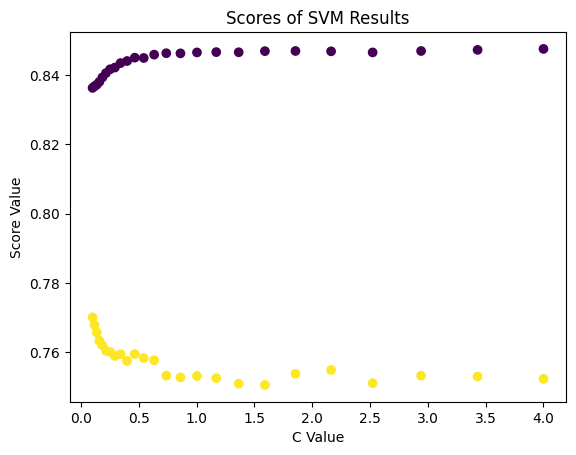

In [20]:
plt.scatter(data['C'],data['Score'],c=data['Kernel'].astype('category').cat.codes)
plt.title('Scores of SVM Results')
plt.xlabel('C Value')
plt.ylabel('Score Value')

In [21]:
clf.score(x_test,y_test)

0.8513865624418389

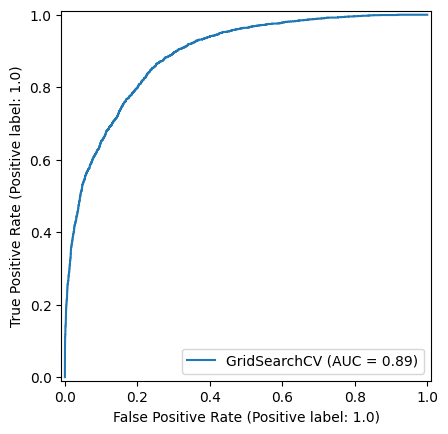

In [22]:
svc_disp = metrics.RocCurveDisplay.from_estimator(clf,x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


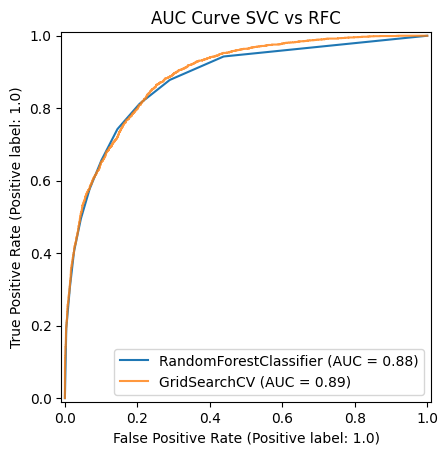

In [23]:
rfc = ensemble.RandomForestClassifier(n_estimators=10,random_state=42)
rfc.fit(x_train,y_train)
ax = plt.gca()
auc_plot = metrics.RocCurveDisplay.from_estimator(rfc,x_test,y_test,ax=ax)
svc_disp.plot(ax=ax,alpha=0.8)
plt.title('AUC Curve SVC vs RFC')
plt.show()